In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harmeme-dataset/val.jsonl
/kaggle/input/harmeme-dataset/test.jsonl
/kaggle/input/harmeme-dataset/val.csv
/kaggle/input/harmeme-dataset/train.jsonl
/kaggle/input/harmeme-dataset/train.csv
/kaggle/input/harmeme-dataset/test.csv
/kaggle/input/harmeme-dataset/vocabulary_100k.txt
/kaggle/input/harmeme-dataset/images/images/covid_memes_4334.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_2591.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_2397.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_3326.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_2223.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_3680.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_2862.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_1818.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_1187.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_421.png
/kaggle/input/harmeme-dataset/images/images/covid_memes_4319.

In [2]:
!git clone https://github.com/destroy-lonely/MIND.git
%cd MIND

Cloning into 'MIND'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 53 (delta 16), reused 39 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 527.18 KiB | 5.92 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/kaggle/working/MIND


In [3]:
!pip install -r /kaggle/working/MIND/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 97.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import shutil

shutil.rmtree("/kaggle/working/MIND/data/HarM", ignore_errors=True)
print("✅ Deleted /kaggle/working/MIND/data/HarM")


✅ Deleted /kaggle/working/MIND/data/HarM


In [5]:
import os, shutil

# Source: your harmeme-dataset
src = "/kaggle/input/harmeme-dataset/images"
# Destination: MIND/data/HarM
dst = "/kaggle/working/MIND/data/HarM"

# Make target directory
os.makedirs(dst, exist_ok=True)

# Create destination images folder
os.makedirs(os.path.join(dst, "images"), exist_ok=True)

# Copy contents of images/ into HarM/images/
src_images = os.path.join(src, "images")
dst_images = os.path.join(dst, "images")

for file in os.listdir(src_images):
    shutil.copy(os.path.join(src_images, file), dst_images)
    
src = "/kaggle/input/harmeme-dataset"
# Copy JSONL files
for fname in ["train.jsonl", "test.jsonl", "val.jsonl"]:
    fpath = os.path.join(src, fname)
    if os.path.exists(fpath):
        shutil.copy(fpath, dst)

print("✅ HarM dataset organized into:", dst)


✅ HarM dataset organized into: /kaggle/working/MIND/data/HarM


In [6]:
%cd /kaggle/working/MIND
!python SSR.py --datasets HarM

/kaggle/working/MIND
Using device: cuda
100%|███████████████████████████████████████| 891M/891M [00:20<00:00, 45.2MiB/s]

--- Processing dataset: FHM ---
Error: Data files not found for FHM. Missing file: data/FHM/test.jsonl

--- Processing dataset: HarM ---
Loaded 354 test items and 3013 train items for HarM.
Generating embeddings for HarM test data...
Test Embeddings: 100%|████████████████████████| 354/354 [00:14<00:00, 24.73it/s]
Generating embeddings for HarM train data...
Train Embeddings: 100%|█████████████████████| 3013/3013 [02:04<00:00, 24.25it/s]
Calculating similarity scores for HarM...
Extracting top-10 similar samples for HarM...
Top-K Extraction: 100%|█████████████████████| 354/354 [00:00<00:00, 3089.20it/s]
Results saved to SSR/HarM_SSR.jsonl
--- Finished processing HarM ---

--- Processing dataset: MAMI ---
Error: Data files not found for MAMI. Missing file: data/MAMI/test.jsonl


In [8]:
!pip install git+https://github.com/haotian-liu/LLaVA.git


  Cloning https://github.com/haotian-liu/LLaVA.git to /tmp/pip-req-build-e07if01c
  Running command git clone --filter=blob:none --quiet https://github.com/haotian-liu/LLaVA.git /tmp/pip-req-build-e07if01c
  Resolved https://github.com/haotian-liu/LLaVA.git to commit c121f0432da27facab705978f83c4ada465e46fd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 89.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 108.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━

In [9]:
!python RID.py --model_path liuhaotian/llava-v1.5-7b --datasets HarM
!python IAI.py --model_path liuhaotian/llava-v1.5-7b --datasets HarM

2025-09-28 07:18:54.998873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759043935.362035     224 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759043935.469473     224 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Loading LLaVA model: llava-v1.5-13b from liuhaotian/llava-v1.5-13b...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
tokenizer_config.json: 100%|███████████████████| 749/749 [00:00<00:00, 6.49MB/s]
tok

--- Finished IAI evaluation for dataset: HarM ---

Final Accuracy for HarM: 0.6864 (243/354)

Final Macro F1 Score for HarM: 0.6494
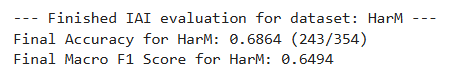